In [1]:
import tensorflow as tf
import PIL 
from PIL import Image
import scipy.io as sio
import glob 
import argparse

import numpy as np
from numpy import matlib
import math
import timeit

# %load_ext autoreload
# %autoreload 2

In [7]:
DATA = 1
from e2e_train_res import * 
X_train, Y_train = load_data(DATA,10)

In [13]:
tf.reset_default_graph()
if DATA == 0:
    X = tf.placeholder(tf.float32, [None, 480, 640, 3])
    Y = tf.placeholder(tf.float32, [None, 480, 640, 1])
elif DATA == 1:
    X = tf.placeholder(tf.float32, [None, 245, 437, 3])
#     Y_ = tf.placeholder(tf.float32, [None, 245, 437, 3])
    Y = tf.placeholder(ztf.float32, [None, 245, 437, 1])
is_training = tf.placeholder(tf.bool)
with tf.variable_scope('Encoder') as enc: 
    latent_y = encoder(X, is_training, DATA)
with tf.variable_scope('Decoder') as dec:
    output = decoder(latent_y, is_training, DATA)
# with tf.variable_scope(enc, reuse=True): 
#     latent_x = encoder(X, is_training, DATA)

trans_loss = tf.nn.l2_loss(output-Y)
# feat_loss = tf.nn.l2_loss(latent_x-latent_y)
# total_loss = trans_loss + feat_loss*0.001    

mean_loss = tf.reduce_mean(trans_loss)
enc_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope='Encoder')
dec_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope='Decoder')

In [14]:

sess = tf.Session(config=tf.ConfigProto(device_count = {'GPU': 0}))
enc_saver = tf.train.Saver(var_list=enc_vars)
dec_saver = tf.train.Saver(var_list=dec_vars)
# writer = tf.summary.FileWriter('./tb',sess.graph)
sess.run(tf.global_variables_initializer())
if DATA == 1:
    enc_saver.restore(sess, './e2e_Model/e2e_data_1_epochs_10_batchsize_10_rate_0.001_enc')
    dec_saver.restore(sess, './e2e_Model/e2e_data_1_epochs_10_batchsize_10_rate_0.001_dec')
if DATA == 0:
    saver.restore(sess, './Models/PT_data_0_epochs_20_batchsize_5_rate_0.01_decay_1.0')

INFO:tensorflow:Restoring parameters from ./loss_network/loss_network_enc


NotFoundError: Key Encoder/c0/bn1/moving_mean not found in checkpoint
	 [[Node: save/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_2/tensor_names, save/RestoreV2_2/shape_and_slices)]]

Caused by op 'save/RestoreV2_2', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-c9c53e6fdb40>", line 3, in <module>
    enc_saver = tf.train.Saver(var_list=enc_vars)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 1139, in __init__
    self.build()
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 1170, in build
    restore_sequentially=self._restore_sequentially)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 691, in build
    restore_sequentially, reshape)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_io_ops.py", line 640, in restore_v2
    dtypes=dtypes, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key Encoder/c0/bn1/moving_mean not found in checkpoint
	 [[Node: save/RestoreV2_2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save/Const_0_0, save/RestoreV2_2/tensor_names, save/RestoreV2_2/shape_and_slices)]]


3087.67


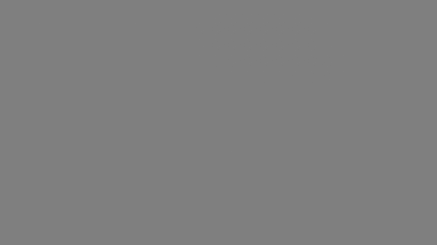

In [11]:
i = 1
IMG , img_loss = sess.run([output, trans_loss], {X: X_train[i:i+1,...],
                        Y: Y_train[i:i+1,...],
                        is_training: False})

print(img_loss)
Image.fromarray(np.uint8(np.squeeze(IMG*255.0)))

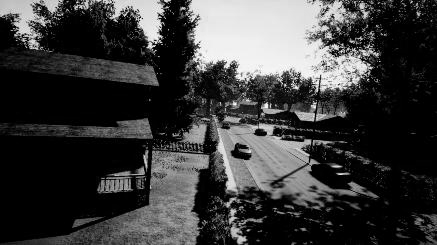

In [12]:
Image.fromarray(np.uint8(np.squeeze(X_train_bw[i,:,:,:]*255.0)))

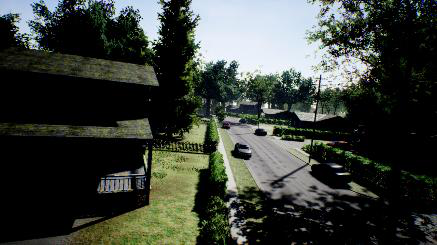

In [41]:
Image.fromarray(np.uint8(np.squeeze(X_train[i,:,:,:]*255.0)))

In [19]:
np.amax(IMG)

0.28083199